
<img src="../images/starwarsstartrek.png" style="float: center; margin: 0px; height: 150px; width: 500px"> 

## SUBREDDIT CLASSIFIER

###### _Author: Afolabi Cardoso_

---

### Pre-Processing and Random Forest modelling

---
#### Contents:
[Overview](#Overview) | [Imports](#Imports) | [Modeling](#Modeling) | [Model evaluation](#Model-evaluation)


---
#### Overview

In this notebook, I will be using Random forest classification to classify the dataset.

---
#### Imports

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
import sklearn.metrics as metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re

#### Load Data

In [41]:
df = pd.read_csv('../data/preprocessed.csv')
df.head()

,title,selftext,created_utc,subreddit,mood
0,wars game,,1646329318,1,-0.5574
1,if a wars game about the famous wars in comics,,1646329234,1,-0.8020
2,what makes a wars fan a fan,,1646329180,1,0.0000
3,what makes a wars fan,,1646328985,1,-0.3182
4,random clone wars thoughts,the series makes me appreciate anakin so much ...,1646328915,1,-0.5574


#### Modeling


#### train/test/split

In [42]:
X = df['title']
y = df['subreddit']

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

#### Pipeline

In [51]:
pipe = Pipeline([
    ('vect',CountVectorizer()),
    ('rf',RandomForestClassifier())
])

#### Grid Search

Setup the parameters for the grid search

In [52]:
params = {
    'vect__stop_words': [None, 'english'],
    'vect__min_df': [1,2],
    'vect__max_df': [1.0, .75, .5, .25],
    'vect__binary': [True, False],
}

In [53]:
gs = GridSearchCV(pipe, param_grid=params, verbose=0)

gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

0.8433333333333334


{'vect__binary': True,
 'vect__max_df': 0.75,
 'vect__min_df': 2,
 'vect__stop_words': 'english'}

#### Model evaluation

Lets plot the confusion matrix 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


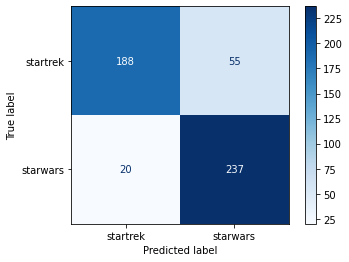

In [13]:
metrics.plot_confusion_matrix(gs, X_test, y_test, cmap = 'Blues',
                             values_format='d', display_labels=['startrek','starwars'])

In [14]:
y_pred = gs.predict(X_test)

In [15]:
misclassified = X_test[y_test != y_pred]

In [16]:
misclassified

1860      Kor s facial expression while going mad is gold
1323                                   No bell riots     
1292                                            Holograms
1664                    Alternate titles for each series 
1981                                 Wordle    The Game  
                              ...                        
939     What do people think the untitled movies are f...
415                Which do you say  AT AT or A TEE A TEE
1829                                   Looking for a game
1385                                             Chakotay
1874                                                  Odo
Name: title, Length: 75, dtype: object

In [55]:
cvec = CountVectorizer(stop_words='english', ngram_range = (1,1))
cvec.fit(misclassified)
X = cvec.transform(misclassified)

In [56]:
cvec_df = pd.DataFrame(X.todense(), columns=cvec.get_feature_names_out())

In [57]:
cvec_df.head()

,061,10,100,1894,1981,19th,2025,2028,4659,action,...,watching,way,wordle,work,wormhole,worse,wounded,wow,yelchin,zoe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


I am going to plot the bar chart of the top misclassified words

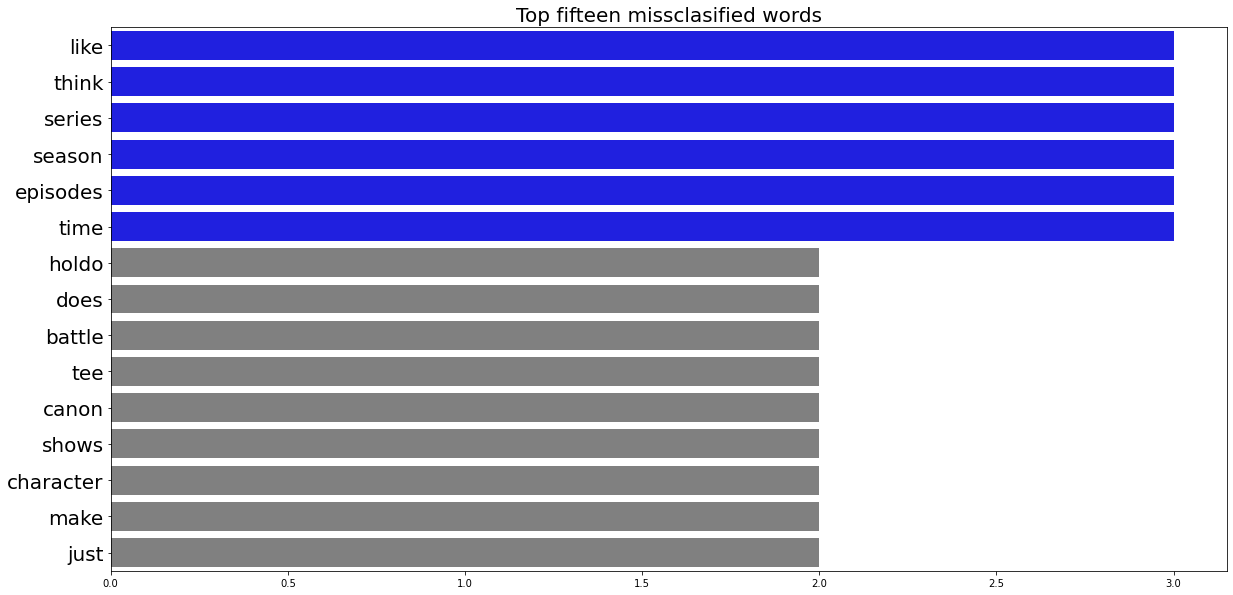

In [60]:
top_misclassified = cvec_df.sum().sort_values(ascending=False)[:15]

plt.figure(figsize=(20,10))

#set color for largest bar
colr = ['grey' if (x<max(top_misclassified)) else 'blue' for x in top_misclassified]

sns.barplot(x = top_misclassified, y = top_misclassified.index, palette = colr)
plt.yticks(fontsize= 20)

param = {'fontsize': 20,
        'fontweight': 2,
        }
plt.title('Top fifteen missclasified words', fontdict=param);